# Functions for initial exploration

You are researching unemployment rates worldwide and have been given a new dataset to work with. The data has been saved and loaded for you as a pandas DataFrame called `unemployment`. You've never seen the data before, so your first task is to use a few pandas functions to learn about this new data.

In [2]:
import pandas as pd
unemployment = pd.read_csv("dataset/clean_unemployment.csv")

In [3]:
# Print the first five rows of unemployment
print(unemployment.head())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


In [4]:
# Print a summary of non-missing values and data types in the unemployment DataFrame
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [6]:
# Print summary statistics for numerical columns in unemployment
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

# Counting categorical values

Recall from the previous exercise that the `unemployment` DataFrame contains 182 rows of country data including `country_code`, `country_name`, `continent`, and `unemployment` percentages from 2010 through 2021.

You'd now like to explore the categorical data contained in `unemployment` to understand the data that it contains related to each continent.

In [7]:
# Count the values associated with each continent in unemployment
# print(unemployment.value_counts("continent"))
print(unemployment["continent"].value_counts())

Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: continent, dtype: int64


# Global unemployment in 2021

It's time to explore some of the numerical data in `unemployment`! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

Your task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

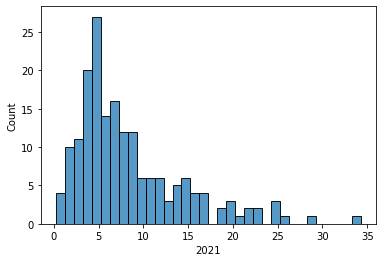

In [8]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x="2021", binwidth=1)
plt.show()

# Detecting data types

A column has been changed in the `unemployment` DataFrame and it now has the wrong data type! This data type will stop you from performing effective exploration and analysis, so your task is to identify which column has the wrong data type and then fix it.

In [9]:
unemployment.dtypes

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

In [10]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype(float)
# Print the dtypes to check your work
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


# Validating continents

Your colleague has informed you that the data on unemployment from countries in Oceania is not reliable, and you'd like to identify and exclude these countries from your unemployment data. The `.isin()` function can help with that!

In [11]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

# Validating range

Now it's time to validate our numerical data. We saw in the previous lesson using `.describe()` that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

Your task in this exercise is to get much more detailed information about the range of `unemployment` data using Seaborn's boxplot, and you'll also visualize the range of unemployment rates in each continent to understand geographical range differences.

0.26 33.56


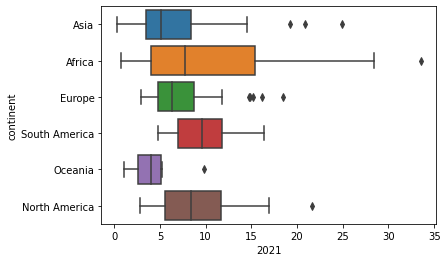

In [12]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment["2021"].min(), unemployment["2021"].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data = unemployment, x="2021", y="continent")
plt.show()

# Summaries with .groupby() and .agg()

In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

In [13]:
# Print the mean and standard deviation of rates by year
print(unemployment.agg(['mean','std']))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  


In [14]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby('continent').agg(['mean','std']))

                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  

# Named aggregations

 Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called `continent_summary` which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

In [15]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021','mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021','std'),
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


# Visualizing categorical summaries

Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.

In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

Your task is to create a bar plot to visualize the means and confidence intervals of unemployment rates across the different continents.

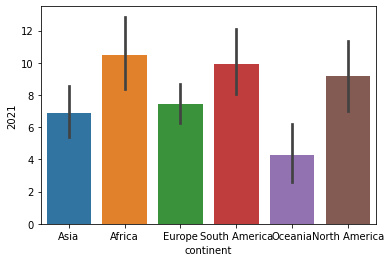

In [16]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data= unemployment, x="continent", y="2021")
plt.show()